# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


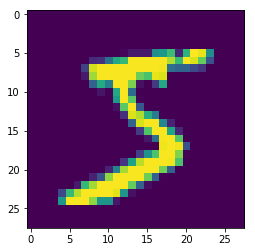

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
from keras.layers import Activation
model = Sequential()

# input layer and the first conv layer 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

# first conv block
model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22

# first transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(8, 1, 1, activation='relu')) # 11

# second conv block
model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7

# second transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # 3

# Last conv block flowed by softmax
model.add(Convolution2D(10, 1, activation='relu')) # 3
model.add(Convolution2D(10, 3)) # 1
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

W0617 07:22:40.075563 139980856981376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0617 07:22:40.110299 139980856981376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 07:22:40.116645 139980856981376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 8)         264       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 16)          1168      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          4640      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [12]:
from keras.layers import Activation
model = Sequential()

# input layer and the first conv layer 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

# first conv block
model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(Convolution2D(24, 3, 3, activation='relu')) # 22

# first transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11

# second conv block
model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(Convolution2D(24, 3, 3, activation='relu')) # 7

# second transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # 3

# Last conv block flowed by softmax
model.add(Convolution2D(10, 1, activation='relu')) # 3
model.add(Convolution2D(10, 3)) # 1
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWar

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 24)        3480      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 24)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 10)        250       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 9, 9, 16)          1456      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 24)          3480      
__________

In [13]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0617 07:22:40.398964 139980856981376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0617 07:22:40.426291 139980856981376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [14]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=40, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0617 07:22:40.548276 139980856981376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0617 07:22:40.636404 139980856981376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 10s 163us/step - loss: 0.4725 - acc: 0.8521 - val_loss: 0.1382 - val_acc: 0.9578
Epoch 2/40
60000/60000 [==============================] - 4s 60us/step - loss: 0.1344 - acc: 0.9595 - val_loss: 0.1018 - val_acc: 0.9695
Epoch 3/40
60000/60000 [==============================] - 4s 60us/step - loss: 0.1032 - acc: 0.9690 - val_loss: 0.0835 - val_acc: 0.9765
Epoch 4/40
60000/60000 [==============================] - 4s 59us/step - loss: 0.0817 - acc: 0.9750 - val_loss: 0.0885 - val_acc: 0.9726
Epoch 5/40
60000/60000 [==============================] - 4s 58us/step - loss: 0.0698 - acc: 0.9790 - val_loss: 0.0561 - val_acc: 0.9829
Epoch 6/40
60000/60000 [==============================] - 4s 59us/step - loss: 0.0601 - acc: 0.9813 - val_loss: 0.0508 - val_acc: 0.9845
Epoch 7/40
60000/60000 [==============================] - 4s 59us/step - loss: 0.0528 - acc: 0.9835 - val_loss: 0.0463 - val_a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
print(score)

[0.05122227275215364, 0.9887]


In [0]:
y_pred = model.predict(X_test)

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[1.04825092e-15 5.55738927e-14 2.30096012e-11 9.37086408e-09
  5.39117187e-19 1.24189409e-13 8.21759182e-23 1.00000000e+00
  6.11408216e-11 3.04852837e-10]
 [3.84364762e-12 6.64126878e-11 1.00000000e+00 7.33202648e-12
  2.74982520e-19 1.35214980e-17 2.63413054e-12 4.69102335e-22
  3.76488554e-12 6.68198276e-21]
 [5.25504709e-11 9.99959588e-01 5.94306186e-07 2.65349742e-09
  3.92082620e-05 2.79152950e-08 2.48462868e-08 7.06965650e-08
  2.98290985e-07 2.28069425e-07]
 [9.99995589e-01 4.28172953e-14 1.22763391e-08 4.15697565e-17
  2.39174918e-13 6.08123100e-12 4.41760085e-06 6.68555055e-13
  1.08976946e-10 1.79386783e-09]
 [1.34102827e-17 9.83227280e-13 5.57018147e-12 1.01301635e-21
  9.99999762e-01 9.74371561e-15 2.39088344e-13 2.82255823e-14
  2.50123251e-12 2.80760162e-07]
 [2.78780221e-10 9.99997735e-01 5.01715434e-08 5.97653801e-11
  2.29288639e-06 3.70141834e-10 3.17176896e-10 2.43425351e-08
  3.88025541e-08 1.45396681e-08]
 [2.74385584e-24 1.20760450e-11 4.19836446e-17 4.57029903e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

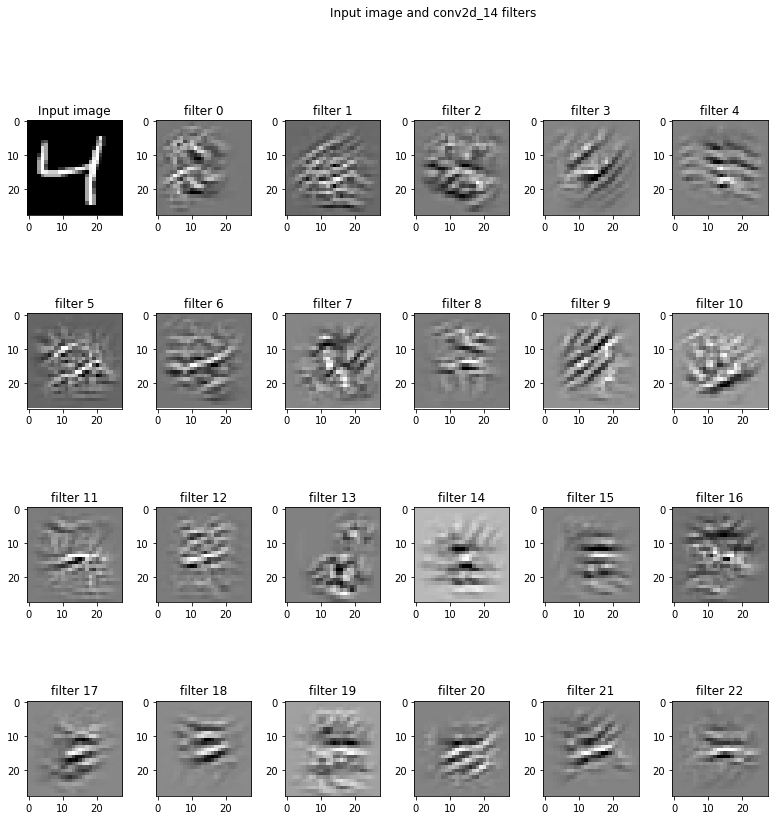

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

Objective :

The aim over the four notebooks is to make sure that we reach an accuracy of at least 99.4% with lesss than 15k parameters. Each improvement of ours will move in that direction of either reduction in number of parameters or improvement in accuracy or both.

Modifications:

1.   Added transition block with 1x1 conv layers.
2.   Reduced channels per layer, we dont need so many parameters to be learnt for mnist.
3.   Increase the batch size to 128


Conclusion :

In the training we can see that training accuracy is very good but the validation accuracy is comparitively bad, leading to overfitting problem. Since we increased the batch size, same 40 epochs are not sufficient with lot of overfitting.